## House Price Prediction Statistics Report

### By: Jerry Zhu

## Abstract

The real estate industry is a rich sector that introduces thousands of new investors, many that are looking to profit from the buying and selling of homes [[1]](#scrollTo=c526B8E9Fol3&line=3&uniqifier=1). On the other hand, the act of selling a house at a fair price, and finding a suitable place to live, is an absolute neccessity in today's society. <br>
In the wake of the COVID-19 pandemic, the average house price in Toronto has gone up by 19.3% [[2]](#scrollTo=c526B8E9Fol3&line=3&uniqifier=1), and many brokers have been struggling to adjust to the sudden change in supply and demand. Being able to predict house prices will help incoming sellers determine an acceptable selling price of a house and can help the customer find a residence that fits their budget. It will also transform and skyrocket the already popular real estate industry and unlock its true potential, and give buyers and homeowners the safety and security they desperately require in a heavily fluctuating market. <br>
In this report, we will attempt to solve the fundamental problem of predicting the price of a house using its physical properties, including its condition, location, and eatures. Today, there is a large amount of data available on relevant statistics and contextual factors relating to house prices, inorder to improve our understanding of the real estate industry. Notably, this problem has already been introduced and dissected in Zillow's Zestimate [[3]](#scrollTo=c526B8E9Fol3&line=3&uniqifier=1) and Kaggle's competition on housing prices [[4]](#scrollTo=c526B8E9Fol3&line=3&uniqifier=1). 
By using the comprehensive dataset from Kaggle, we will attempt to predict the price of a house using regression techniques, and further extend the accuracy of our hypothesis using a machine learning model and advanced regression [[5]](#scrollTo=c526B8E9Fol3&line=3&uniqifier=1). Finally, using a web application [[6]](#scrollTo=c526B8E9Fol3&line=3&uniqifier=1), we will explore the practicality of such a model in real life, and its relevance in the current real estate industry. 

### Initial Analysis

First off, we have to find a quantitative variable to use as the dependent variable. To do this, we will extract the dataset, and perform an **exploratory data analysis**. 

First off, we import the Kaggle Dataset using the Kaggle API, setup a root folder to dump the zip archive file from the Kaggle competitions cloud, and extract the contents of the zip archive into the root folder. Finally, we delete the zip archive file, and view the contents of the dataset (data_description.txt). 

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bobliuuu","key":"51f254951fd0f16f0e345c1593c94a0e"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           8027       1082  0.9375           
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           5382        136  1.0              
muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00           1552        890  0.875            
paradisejoy/top-hits-spotify-from-20002019   

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 62.6MB/s]


In [ ]:
!cd /content

In [ ]:
!ls

house-prices-advanced-regression-techniques.zip  kaggle.json  sample_data


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!rm house-prices-advanced-regression-techniques.zip

### Description Of Data

In [ ]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Dataset Files

train.csv - Main dataset of aggregate values for each house. 
test.csv - Another dataset of aggregate values for testing on smaller data. 
sample_submission.csv - A sample of houses and their prices (used for predictions).
data_description.txt - A description of the compiled data. 

### Dependent Variable

From the description of the data content of the dataset, all the factors relate to housing price in some way, so `SalePrice` would be the most natural dependent variable. 
We can also see that the data is cross sectional data, as the data is ID-stamped, not time stamped, and the data is collected on a single group of people, at some point in time. <br>
To find a suitable independent variable to compare against the dependent variable, we can construct a correlation matrix, to determine the correlation of each variable with the dependent variable of `SalePrice`. <br>
To do this, we will convert the training dataset (which contain the aggregate entries) into a `DataFrame` using Python's Pandas module, to help us visualize the data. We will then drop all the non-numeric (qualitative) rows in the dataset, and create a correlation matrix using Pandas' `corr()` command [[6]](#scrollTo=c526B8E9Fol3&line=3&uniqifier=1). Finally, we will sort the columns by the correlation, to find the quantitative variable(s) with the highest correlation with `SalePrice`, to be used as our independent variables. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_train = pd.read_csv('../content/train.csv')

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
numerical_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = df_train.select_dtypes(include=numerical_types)

In [ ]:
print("Total number of columns:", len(df_train.columns))
print("Number of numerical (quantitative) columns:", len(df_numeric.columns))

Total number of columns: 81
Number of numerical (quantitative) columns: 38


In [ ]:
corr_matrix = df_numeric.corr()
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


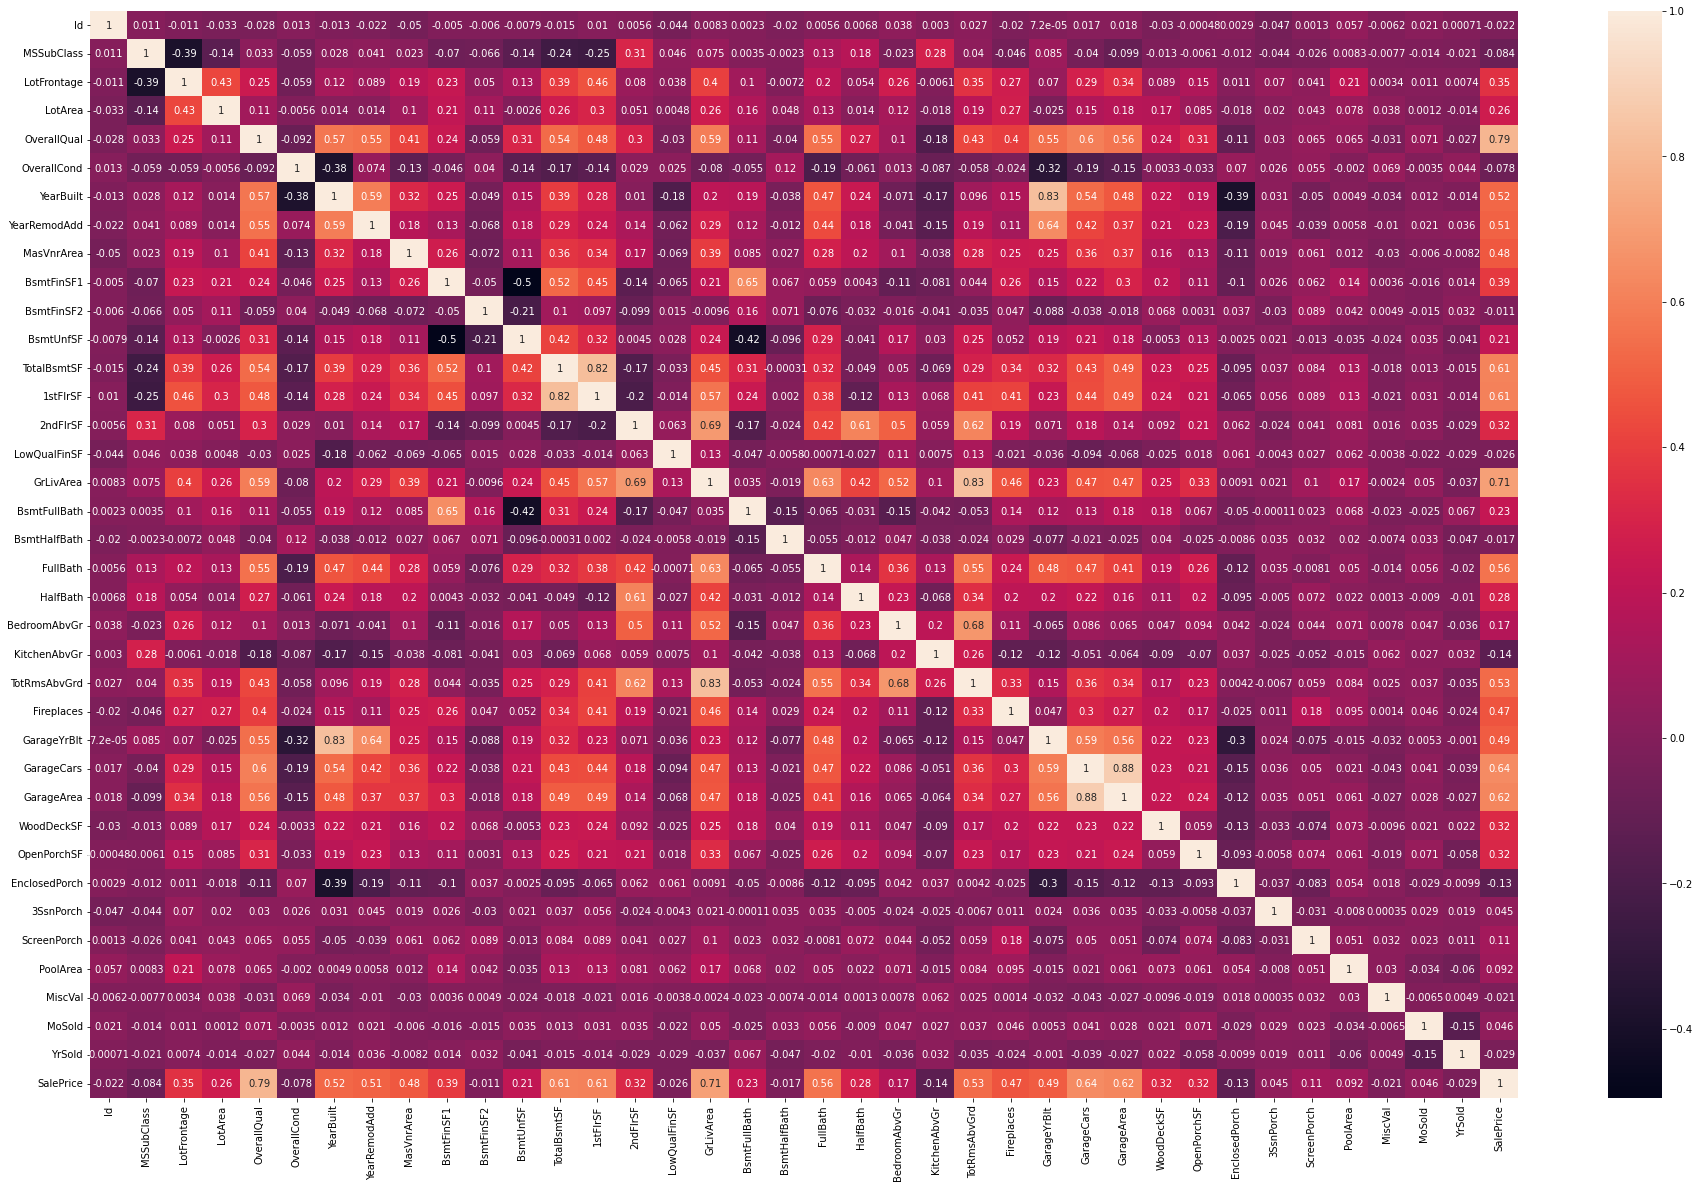

In [ ]:
plt.subplots(figsize=(32, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
corr_matrix_saleprice = corr_matrix.copy()
corr_matrix_saleprice.drop(corr_matrix.columns.difference(['SalePrice']), 1, inplace = True)
corr_matrix_saleprice = corr_matrix_saleprice.drop(['SalePrice', 'Id'])
corr_matrix_saleprice

,SalePrice
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378


In [ ]:
corr_sorted = corr_matrix_saleprice.copy()
corr_sorted = corr_sorted.sort_values(by = ['SalePrice'], ascending = False, kind = 'quicksort', key = abs)
corr_sorted

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


### Variables with highest correlation

In [ ]:
corr_sorted.head()

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581


### Independent Variables

Since overall living quality (`OverallQual`) and size of living area (`GrLivArea`) have the highest correlations with `SalePrice`, we will use these two variables as our independent variables, to explain what our dependent variable depends on. <br>
This conclusion makes sense, as we know from prior knowledge that comfort of living and size of living area are important considerations when choosing a suitable house. However, we can extend on our prior knowledge, and use statistical analysis to explore exactly how crucial these variables are to the sale price of a house. 

### Hypothesis

My hypothesis is that as `OverallQual` and `GrLivArea` increase, `SalePrice` increases. 
To test this hypothesis, I will first isolate the data of each independent variable and the dependent variable, and graph the data to find such a correlation, and then prove this correlation. <br>
To do this, I will drop all rows except the desired ones relating to the correlation I am trying to determine. I will then get a sample of the data, and graph it using Python's seaborn module's `sns.regplot`, which will create a regression model including a scatter plot and line of best fit for the data. Using this, I can determine any trends in the data. 

In [ ]:
df_dropped = df_train.copy()
df_dropped.drop(df_dropped.columns.difference(['Id', 'OverallQual', 'GrLivArea', 'SalePrice']), 1, inplace = True)
# df_dropped = df_dropped[['Id', 'OverallQual', 'GrLivArea', 'SalePrice']]

In [ ]:
df_dropped.columns

Index(['Id', 'OverallQual', 'GrLivArea', 'SalePrice'], dtype='object')

In [ ]:
df_dropped.head()

,Id,OverallQual,GrLivArea,SalePrice
0,1,7,1710,208500
1,2,6,1262,181500
2,3,7,1786,223500
3,4,7,1717,140000
4,5,8,2198,250000


In [ ]:
df_dropped.shape # (rows, columns)

(1460, 4)

### Sampling Of Data

Since the dataset is very large (over 1000 columns), we will have to collect an unbiased sample of the data. To do this, we will use three common sampling methods: simple random sampling, systematic random sampling, and convenience sampling. After collecting the samples using the various methods, we will save them as `.csv` (comma seperated values) files instead of dataframes, for easier access and storage. Finally, we will calculate and determine which sampling method is the best, using the correlation `corr()` of each sampling method. 

In [ ]:
df_rand = df_dropped.sample(n = 100)
df_rand.head()

,Id,OverallQual,GrLivArea,SalePrice
1455,1456,6,1647,175000
1256,1257,8,1987,301500
958,959,7,1337,185000
185,186,10,3608,475000
1422,1423,6,848,136500


In [ ]:
df_rand.to_csv(r'simplerand_num.csv', index=False) # Export collected data as csv

In [ ]:
# Find size of interval
interval = df_dropped.shape[0] // 100
print(interval)

14


In [ ]:
df_rand2 = df_dropped[df_dropped.index % interval == 0]
df_rand2.head()

,Id,OverallQual,GrLivArea,SalePrice
0,1,7,1710,208500
14,15,6,1253,157000
28,29,5,1600,207500
42,43,5,884,144000
56,57,8,1739,172500


In [ ]:
df_rand2.to_csv(r'intervalrand_num.csv', index=False) 

In [ ]:
df_rand3 = df_dropped.head(100)
df_rand3.head()

,Id,OverallQual,GrLivArea,SalePrice
0,1,7,1710,208500
1,2,6,1262,181500
2,3,7,1786,223500
3,4,7,1717,140000
4,5,8,2198,250000


In [ ]:
df_rand3.to_csv(r'convenience_num.csv', index=False) 

### Correlations of Different Sampling Techniques

In [ ]:
df_rand.corr() # Simple random sampling

,Id,OverallQual,GrLivArea,SalePrice
Id,1.000000,-0.032963,-0.044696,-0.055773
OverallQual,-0.032963,1.000000,0.674616,0.870631
GrLivArea,-0.044696,0.674616,1.000000,0.815114
SalePrice,-0.055773,0.870631,0.815114,1.000000


In [ ]:
df_rand2.corr() # Systematic random sampling

,Id,OverallQual,GrLivArea,SalePrice
Id,1.000000,0.008452,0.015462,-0.029772
OverallQual,0.008452,1.000000,0.586582,0.833192
GrLivArea,0.015462,0.586582,1.000000,0.742336
SalePrice,-0.029772,0.833192,0.742336,1.000000


In [ ]:
df_rand3.corr() # Convenience random sampling

,Id,OverallQual,GrLivArea,SalePrice
Id,1.000000,-0.219727,-0.012387,-0.162735
OverallQual,-0.219727,1.000000,0.673248,0.855061
GrLivArea,-0.012387,0.673248,1.000000,0.735129
SalePrice,-0.162735,0.855061,0.735129,1.000000


### Sampling Conclusion

We notice that the best sampling method (the one that gives the highest correlations with `SalePrice`) is simple random sampling. This make sense because a purely pseudorandom sampling algorithm will generate the least amount of bias. <br>
Next, we will graph the data of this sampling method to determine any trends in the two variables. We will graph a scatter plot and a line of best fit. 

Text(0, 0.5, 'Price Of House ($)')

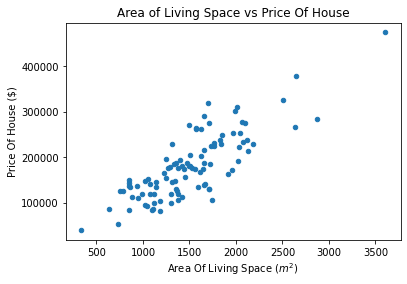

In [ ]:
scatterplot = df_rand.plot.scatter(x = 'GrLivArea', y = 'SalePrice', title='Area of Living Space vs Price Of House')
scatterplot.set_xlabel(r"Area Of Living Space ($m^2$)")
scatterplot.set_ylabel("Price Of House ($)")

Text(0, 0.5, 'Price Of House ($)')

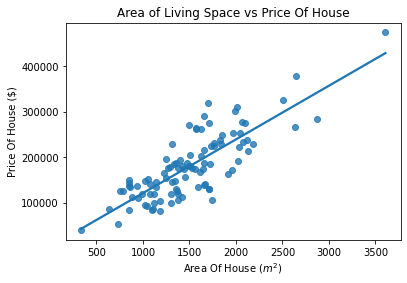

In [ ]:
# No confidence interval
regression = sns.regplot(x = 'GrLivArea', y = 'SalePrice', data=df_rand, fit_reg = True, 
            ci = None)
regression.set(title='Area of Living Space vs Price Of House')
regression.set_xlabel(r"Area Of House ($m^2$)")
regression.set_ylabel("Price Of House ($)")

### Trends 

From the overall trend of the graph and the line of best fit, we see that there is a strong positive correlation between the area of living space and the price of the house, as well as the overall quality of the house and the price of the house. <br>
Therefore, the variables we found are useful, and we can continue by proving this correlation using a more in-depth statistical analysis of the trends and relationship of the variables. 

## Works Cited

[1]:https://www.researchgate.net/publication/320801620_Modeling_House_Price_Prediction_using_Regression_Analysis_and_Particle_Swarm_Optimization_Case_Study_Malang_East_Java_Indonesia <br>

[2]:https://globalnews.ca/news/8400321/canada-housing-prices-central-bank-warning/ <br>

[3]:https://www.zillow.com/blog/zestimate-updates-230614/ <br>

[4]:House Prices Dataset. Retrieved 05/16/22 from 
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data. <br>

[5]:https://m2pi.ca/project/2020/bc-financial-services-authority/BCFSA-final.pdf <br>

[6]:TBD <br>

[7]:https://pandas.pydata.org/docs/reference/index.html <br>


In [58]:
# Converting this Jupyter notebook to PDF and html
# https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html 
!pip install nbconvert

In [82]:
!jupyter nbconvert --to html Culminating_Statistics_Project.ipynb

[NbConvertApp] Converting notebook Culminating_Statistics_Project.ipynb to html
[NbConvertApp] Writing 1227150 bytes to Culminating_Statistics_Project.html


In [79]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscri

In [81]:
!jupyter nbconvert --to pdf Culminating_Statistics_Project.ipynb

[NbConvertApp] Converting notebook Culminating_Statistics_Project.ipynb to pdf
[NbConvertApp] Support files will be in Culminating_Statistics_Project_files/
[NbConvertApp] Making directory ./Culminating_Statistics_Project_files
[NbConvertApp] Making directory ./Culminating_Statistics_Project_files
[NbConvertApp] Making directory ./Culminating_Statistics_Project_files
[NbConvertApp] Writing 97154 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 650486 bytes to Culminating_Statistics_Project.pdf
